**1. Import Library**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

**2. Load Dataset**

In [ ]:
data = pd.read_csv('/content/students_adaptability_level_online_education.csv')

**3. EDA**

In [ ]:
print("Dataset Information:")
data.info()
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB

First 5 rows of the dataset:
  Gender    Age

**A. Adaptability Level**

<Axes: ylabel='count'>

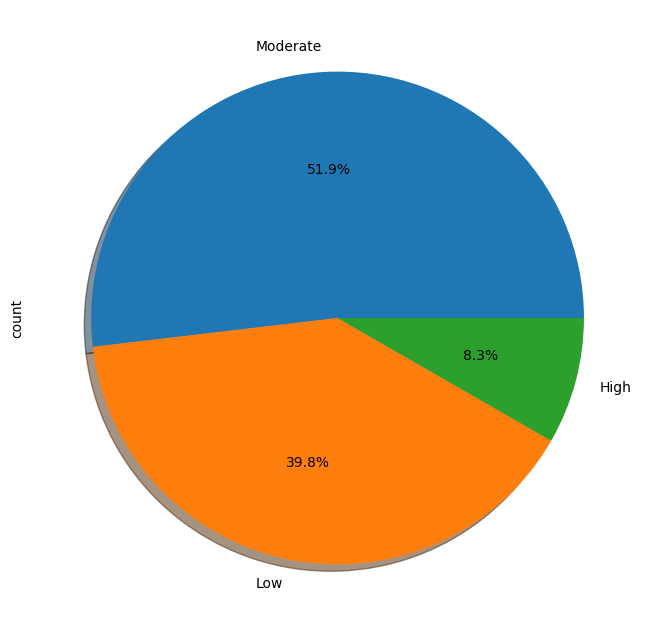

In [ ]:
plt.figure(figsize=(12,8))
data['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

**B. Gender**

<Axes: ylabel='count'>

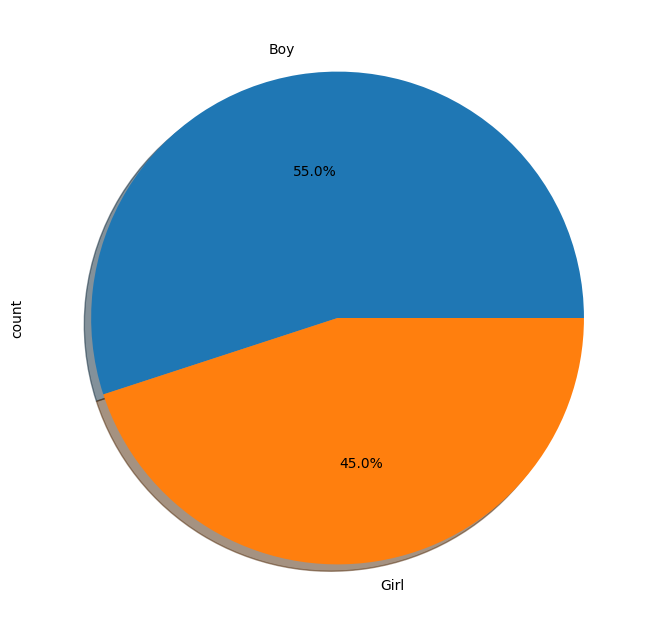

In [ ]:
plt.figure(figsize=(12,8))

data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

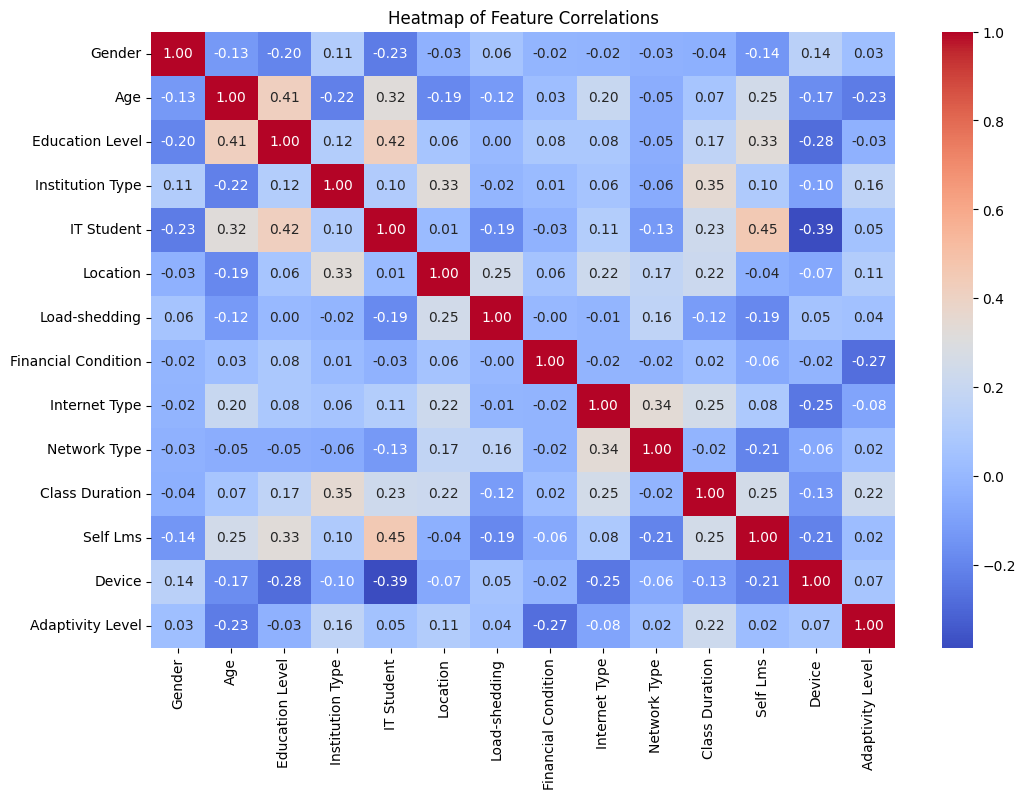

In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

**4. Data Cleaning**

In [ ]:
print("Jumlah duplikat:", data.duplicated().sum())
data = data.drop_duplicates()

print("Missing value per kolom:\n", data.isnull().sum())

print("Jumlah duplikat:", data.duplicated().sum())

Jumlah duplikat: 949
Missing value per kolom:
 Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64
Jumlah duplikat: 0


**5. Encoding Data Kategorikal**

In [ ]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**6. Pisahkan Fitur dan Label**

In [ ]:
X = data.drop('Adaptivity Level', axis=1)
y = data['Adaptivity Level']

**7. Normalisasi Data**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**8. Menangani Imbalance Class dengan SMOTE**

Distribusi label sebelum SMOTE:
 Adaptivity Level
2    625
1    480
0    100
Name: count, dtype: int64
Distribusi label setelah SMOTE:
 Adaptivity Level
2    625
1    625
0    625
Name: count, dtype: int64


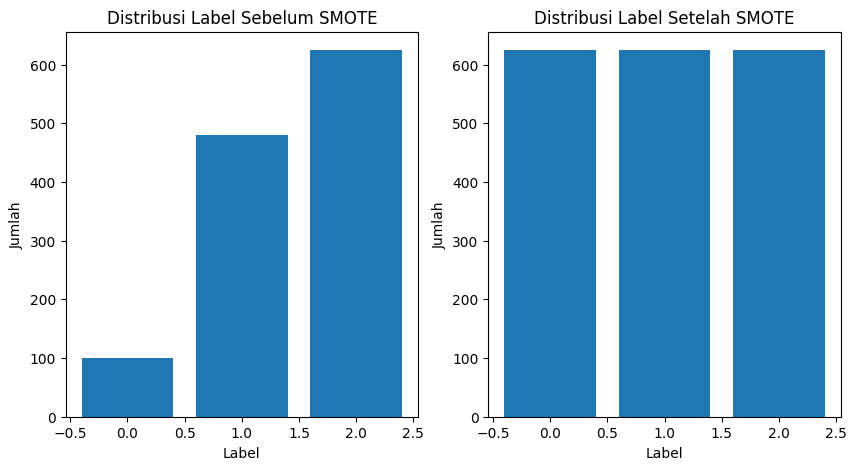

In [ ]:
print("Distribusi label sebelum SMOTE:\n", y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi label setelah SMOTE:\n", y_resampled.value_counts())

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(y.value_counts().index, y.value_counts().values)
axes[0].set_title('Distribusi Label Sebelum SMOTE')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Jumlah')

axes[1].bar(y_resampled.value_counts().index, y_resampled.value_counts().values)
axes[1].set_title('Distribusi Label Setelah SMOTE')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Jumlah')

plt.show()

**9. Split Data (Train-Test Split)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

**10. Training Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**11. Evaluasi Random Forest**

In [ ]:
y_pred = rf_model.predict(X_test)

**12. Hasil Akhir**

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       125
           1       0.95      0.94      0.94       125
           2       0.95      0.83      0.89       125

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375

Accuracy Score: 0.9173333333333333
Confusion Matrix:
[[123   0   2]
 [  4 117   4]
 [ 15   6 104]]


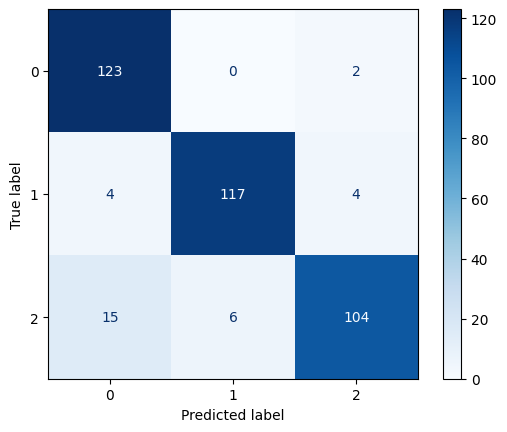

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()